# Notes
create main functions in a separate py file and call functions. attach this to repo of course

Instructions:

Attempt to solve the following problem on the provided dataset using Python (no restrictions on
package usage):
● You’re given a dataset of Starcraft player performance data in ranked games. We want
to develop a model to predict a player’s rank using the information provided in the
dataset.
● Document your decision making throughout the model building process (EDA, ETL,
modeling, evaluation, etc).
○ Try to functionize any repetitive tasks so that the workflow is simplified.
● Once you’ve settled on your model, communicate your findings to non-technical
stakeholders.
● Hypothetical: after seeing your work, your stakeholders come to you and say that they
can collect more data, but want your guidance before starting. How would you advise
them based on your EDA and model results?


EDA -> ETL piepline (extract, transform, load), modeling, evaluation, etc. 
lastly answer hypothetical question

# Evil Geniuses Assessment: Starcraft Prediction

## By Kamen Redfield

### Quick Overview of All Steps

### Setup

In [90]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

starcraft = pd.read_csv('data/starcraft_player_data.csv')

### EDA

- no missing data
- age is an object because missing data is input as a "?"
- same with hours per week and total hours
- description of what PAC (perception action cycle) is https://tl.net/forum/starcraft-2/401425-starcraft-2-science-skillcraft-results 

The first thing to always look for missing data while also reading data dictionary. The only thing I was unfamiliar with was a PAC

In [7]:
starcraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [100]:
starcraft

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [101]:
starcraft["Age"].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', '?'], dtype=object)

important to see what distributions of player ranks we have, and it would be helpful to change it to words for me personally.

In [102]:
rank_dict = {1:"Bronze", 2:"Silver", 3:"Gold", 4:"Plat", 5:"Diamond", 6:"Master", 7:"GrandMaster", 8:"Pro"}
starcraft["LeagueName"] = starcraft["LeagueIndex"].apply(lambda x: rank_dict[x])
starcraft["LeagueName"].value_counts()

Plat           811
Diamond        806
Master         621
Gold           553
Silver         347
Bronze         167
Pro             55
GrandMaster     35
Name: LeagueName, dtype: int64

<AxesSubplot:ylabel='Frequency'>

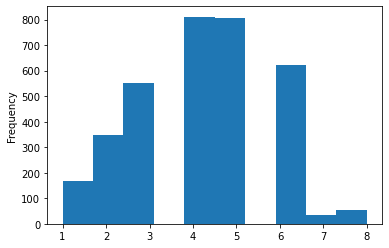

In [103]:
starcraft["LeagueIndex"].plot(kind="hist")  #somewhat bell-shaped

we need to look at the distributions of the missing data in the age and both hours columns to see the best way to handle the data


In [53]:
starcraft[(starcraft["Age"] == "?") | (starcraft["HoursPerWeek"] == "?") | (starcraft["TotalHours"] == "?")][["LeagueName",
        "Age", "HoursPerWeek", "TotalHours"]]

,LeagueName,Age,HoursPerWeek,TotalHours
358,Diamond,17,20,?
1841,Diamond,18,?,?
3340,Pro,?,?,?
3341,Pro,?,?,?
3342,Pro,?,?,?
3343,Pro,?,?,?
3344,Pro,?,?,?
3345,Pro,?,?,?
3346,Pro,?,?,?
3347,Pro,?,?,?


almost all of the missingness is in pro players with a couple diamons players slightly in the mix as well. 

This means I cannot base my model heavily on any of these three variables if I want to be able to predict pro players with accuracy. A could be built model where if the age is missing it guesses pro player but that isn't helpful for our goal and then the model would be useless if we did have the age of a pro player. That being said pro players are a very small fraction of the player base

first thing I want to look at is a basic correlation then I can explore the most important variables


I have some knowledge of starcraft, and I expect that higher APM, Hotkey usage, and of course hours played should be some of the highest correlates to rank but let's see

In [38]:
starcraft.drop(columns="GameID").corr()[["LeagueIndex"]].sort_values(by="LeagueIndex")

,LeagueIndex
ActionLatency,-0.673939
GapBetweenPACs,-0.553246
UniqueUnitsMade,0.133508
ActionsInPAC,0.143121
ComplexAbilitiesUsed,0.145733
ComplexUnitsMade,0.148834
TotalMapExplored,0.220676
MinimapRightClicks,0.233231
WorkersMade,0.295643
MinimapAttacks,0.312544


In [59]:
# the same thing but with pro players removed so we can see the correlation of age and hours columns
no_mi_data = starcraft[starcraft["TotalHours"] != "?"].drop(columns="GameID")
no_mi_data[["Age", "TotalHours", "HoursPerWeek"]] = no_mi_data[["Age", "TotalHours", "HoursPerWeek"]].astype('int64')
no_mi_data.corr()[["LeagueIndex"]].sort_values(by="LeagueIndex") 

,LeagueIndex
ActionLatency,-0.659940
GapBetweenPACs,-0.537536
Age,-0.127518
TotalHours,0.023884
ActionsInPAC,0.140303
UniqueUnitsMade,0.151933
ComplexAbilitiesUsed,0.156033
ComplexUnitsMade,0.171190
MinimapRightClicks,0.206380
HoursPerWeek,0.217930


I was wrong about total hours and it isn't correlated at all with rank, as well as age and hours per week being relatively less impactful with slight correlations so I feel pretty good about dropping those from the model

I want to keep everything with a strong correlation, but also I should try a model including all the variables, so two models. 

Let's look into the 5 strongest correlations, which are: ActionLatency, GapBetweenPACs, APM, NumberOfPACs, and AssignToHotkeys

In [107]:
avg_by_rank = starcraft.groupby("LeagueName").mean().sort_values(by="LeagueIndex", ascending=False)[["ActionLatency",
                                "GapBetweenPACs", "APM", "NumberOfPACs", "AssignToHotkeys", "LeagueIndex"]]
avg_by_rank

,ActionLatency,GapBetweenPACs,APM,NumberOfPACs,AssignToHotkeys,LeagueIndex
LeagueName,,,,,,
Pro,35.390153,18.969773,267.341236,0.005237,0.000937,8.0
GrandMaster,40.342903,22.978160,189.555686,0.005111,0.000723,7.0
Master,48.947837,30.207895,158.683211,0.004231,0.000512,6.0
Diamond,56.085007,34.726473,131.520718,0.003744,0.000414,5.0
Plat,64.793765,41.041426,105.847166,0.003310,0.000340,4.0
Gold,73.697301,46.143882,89.971260,0.002976,0.000282,3.0
Silver,81.270053,53.788886,74.780917,0.002650,0.000222,2.0
Bronze,95.404977,65.654987,59.539277,0.002363,0.000185,1.0


we can see very clear lines here with ActionLatency and	GapBetweenPACs going down with rank and the other 3 going up with rank.

This makes sense because starcraft is a game with an important emphasis on micromanagement and multi-tasking. So the variables about latency and delay reduce with higher rank and the variables about quickness and number of actions in short periods of times increase with rank.

<AxesSubplot:xlabel='ActionLatency', ylabel='LeagueName'>

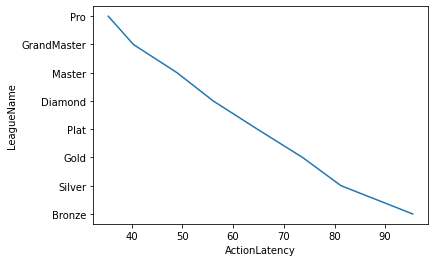

In [110]:
sns.lineplot(data=avg_by_rank, x="ActionLatency", y="LeagueName")

In [112]:
ranks = [1, 2, 3, 4, 5, 6, 7, 8]

<AxesSubplot:xlabel='ActionLatency', ylabel='LeagueName'>

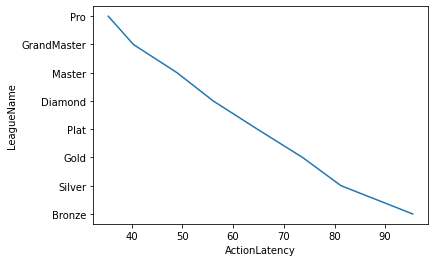

In [129]:
sns.lineplot(data=avg_by_rank.reset_index(), x="ActionLatency", y="LeagueName")

<AxesSubplot:xlabel='LeagueName'>

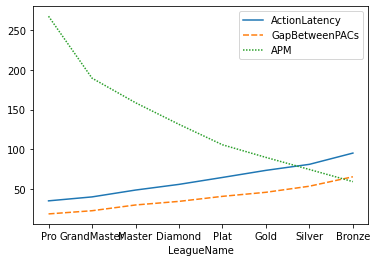

In [121]:
sns.lineplot(data=avg_by_rank[["ActionLatency", "GapBetweenPACs", "APM"]])

combine all these plots into one figure with subplots before turning in

### Modeling and Evaluation

So we need to train a multiclass classifier to predict the rank. We can try a few different models: NearestNeighbor, logisticregressionCV, 

In [131]:
starcraft

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,LeagueName
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,...,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000,Diamond
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,...,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208,Diamond
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,...,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189,Plat
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,...,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384,Gold
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,...,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,...,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000,Pro
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,...,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000,Pro
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,...,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000,Pro
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,...,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631,Pro


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [136]:
X_train, X_test, y_train, y_test = train_test_split(starcraft.drop(columns=["LeagueIndex", "LeagueName",
                                                                            "Age", "TotalHours", "HoursPerWeek"]),
                                                    starcraft["LeagueName"], test_size=0.33, random_state=42)

In [137]:
clf = LogisticRegressionCV(cv=10, ).fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [139]:
clf.predict(X_test)

array(['Diamond', 'Pro', 'Bronze', ..., 'Plat', 'Diamond', 'Master'],
      dtype=object)

In [147]:
pd.Series(clf.predict(X_test)).value_counts()

Plat       391
Diamond    284
Master     185
Gold       135
Silver      57
Bronze      49
Pro         20
dtype: int64

In [148]:
starcraft["LeagueName"].value_counts()

Plat           811
Diamond        806
Master         621
Gold           553
Silver         347
Bronze         167
Pro             55
GrandMaster     35
Name: LeagueName, dtype: int64

In [140]:
clf.predict_proba(X_test).shape

(1121, 8)

In [141]:
clf.score(X_test, y_test)

0.3862622658340767

### Findings